## Loading the necessary Libraries

In [1]:
# Loading the necessary Libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Just printing the tenserflow version. Can skip this cell

In [2]:
# Just printing the tenserflow version. Can skip this cell
print("Tensorflow version we are using :", tf.__version__)

Tensorflow version we are using : 1.10.0


## Loading our dataset.
        # Spliting our dataset into training and testing sets just to check weather our model generalized or overfit to data.

In [3]:
mnist_data = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

## Normalizing the datasets.
             --> This can be done in two ways By Using the keras or by normally understanding the data and perform some operation that normalize our data.(Here divide by 255)
                # Method 1: By Using Keras
                    x_train = keras.utils.normalize(x_train,axis=1)
                    x_test = keras.utils.normalize(x_test,axis=1)

                # Another alternative for normalizing dataset:
                    x_train = x_train/255
                    x_test = x_test/255

In [4]:
x_train = keras.utils.normalize(x_train,axis=1)
x_test = keras.utils.normalize(x_test,axis=1)

# Another alternative for normalizing dataset:
# x_train = x_train/255
# x_test = x_test/255

## Displaying one of the digit

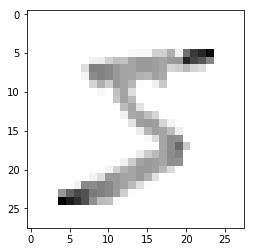

In [5]:
plt.imshow(x_train[0], cmap=plt.cm.binary) 

## Creating our model. Here the following code simply creates the structure of our Nerual Network.

In [6]:
model = keras.models.Sequential()    # Creates a sequental model.
model.add(keras.layers.Flatten())    # Our input layer 
model.add(keras.layers.Dense(128, activation=tf.nn.relu))    # Hidden Layer 1 with 128 neurons and Using ReLu Activation.
model.add(keras.layers.Dense(128, activation=tf.nn.relu))    # Hidden Layer 2 with 128 neurons and Using ReLu Activation.
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))  # Output Layer.

In [7]:
# Declaring our loss function, optimizer, metrics
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['mse','accuracy'])

## Training

In [8]:
model.fit(x_train,y_train,epochs=5)   # Training our dataset with 5 epochs

Epoch 1/5
60000/60000 [==============================] - 21s 353us/step - loss: 0.2648 - mean_squared_error: 27.3798 - acc: 0.9225
Epoch 2/5
60000/60000 [==============================] - 11s 191us/step - loss: 0.1038 - mean_squared_error: 27.3887 - acc: 0.9678
Epoch 3/5
60000/60000 [==============================] - 12s 202us/step - loss: 0.0727 - mean_squared_error: 27.3905 - acc: 0.9770
Epoch 4/5
60000/60000 [==============================] - 13s 223us/step - loss: 0.0534 - mean_squared_error: 27.3915 - acc: 0.9830
Epoch 5/5
60000/60000 [==============================] - 14s 240us/step - loss: 0.0411 - mean_squared_error: 27.3921 - acc: 0.9864


## Examining how our trained model behaves with the testing data

In [9]:
val_loss, val_mean, val_acc = model.evaluate(x_test,y_test)   
print("Validation Loss :",val_loss)
print("Validation Mean :", val_mean)
print("Validation Accuracy :", val_acc)

10000/10000 [==============================] - 1s 58us/step
Validation Loss : 0.08834487563488073
Validation Mean : 27.337507135009766
Validation Accuracy : 0.9729


### Just for cross checking purpose lets examine the 642 data element and see how our model predicts that...

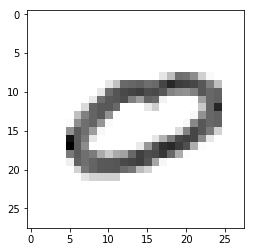

In [10]:
plt.imshow(x_test[642],cmap=plt.cm.binary)

In [11]:
predictions = model.predict_classes([x_test]) # this statement returns array of model's outputs for entire test data set

In [12]:
predictions[642] # Prediction for 642th element of our test dataset

0

In [13]:
prediction_probability = model.predict_proba([x_test])[642]
# recall our output layer is of softmax. And hence the statement gives the probability of digit being entire class.
# We are looking at 642th element,right?  hence storing the probability of 642th element all over avaliable classes.

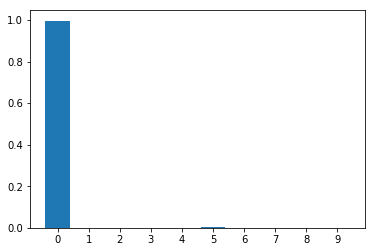

In [14]:
# Ploting the result... Graphs shows that the given data is digit 0. You can also observe that there is a small rise in probability at 5. 
# i.e.Our model predicted the possibility of our number being 5 with very less probability.   
plt.bar(range(10),prediction_probability);plt.xticks(range(10));

In [15]:
model.summary() # Summery of our model.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### To Describe how and why the data normalization is important ? I have reinitialized the x_train,x_test with the non - normalized values and try to train and displayed the accuracy.
        --> We can observe that without data normalization our model with same no. of neurons still falls shot in accuracy. 
            This clearly shows how data normalization is important. And especially for Neural Networks Data Normalization 
            is one of the important factor/aspect to consider.

In [16]:
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

In [17]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 13s 220us/step - loss: 4.4778 - mean_squared_error: 27.3945 - acc: 0.7217
Epoch 2/5
60000/60000 [==============================] - 14s 239us/step - loss: 3.3782 - mean_squared_error: 27.3945 - acc: 0.7902
Epoch 3/5
60000/60000 [==============================] - 13s 218us/step - loss: 2.6418 - mean_squared_error: 27.3945 - acc: 0.8359
Epoch 4/5
60000/60000 [==============================] - 14s 241us/step - loss: 3.1224 - mean_squared_error: 27.3945 - acc: 0.8061
Epoch 5/5
60000/60000 [==============================] - 13s 217us/step - loss: 2.9865 - mean_squared_error: 27.3945 - acc: 0.8144


#### Checking the model accuracy soon after re-normalizing.
        --> We observe that the accuracy is improved soon after normalizing the data.
        
NOTE: 1) Here 'model' is the network used over and over to train normalized and non-normalized data successively and hence the model with the training examples supplied in every cell has impact on the next training cell. (Here Assuming the effect is Zero. But in practice the effect might not be Zero.)

In [18]:
# retraining with normalized data...
x_train = keras.utils.normalize(x_train,axis=1)
x_test = keras.utils.normalize(x_test,axis=1)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 14s 238us/step - loss: 0.2971 - mean_squared_error: 27.3909 - acc: 0.9446
Epoch 2/5
60000/60000 [==============================] - 13s 219us/step - loss: 0.0885 - mean_squared_error: 27.3904 - acc: 0.9722
Epoch 3/5
60000/60000 [==============================] - 14s 237us/step - loss: 0.0607 - mean_squared_error: 27.3912 - acc: 0.9812
Epoch 4/5
60000/60000 [==============================] - 14s 240us/step - loss: 0.0439 - mean_squared_error: 27.3919 - acc: 0.9861
Epoch 5/5
60000/60000 [==============================] - 13s 219us/step - loss: 0.0340 - mean_squared_error: 27.3924 - acc: 0.9890


### Saving our Model

In [19]:
model.save('MNIST_DIGIT_KERAS.model')

### Retrieving saved Model

In [20]:
keras.models.load_model('MNIST_DIGIT_KERAS.model')